In [17]:
import polars as pl
import pandas as pd
import timeit
import plotly.express as px
from IPython import display

In [27]:
#pl.read_csv('players_20.csv')
timeit.timeit(lambda: pl.read_csv('players_20.csv'), number=10)

0.10510989999966114

In [28]:
#pd.read_csv('players_20.csv')
timeit.timeit(lambda: pd.read_csv('players_20.csv'), number=10)

1.6184856999998374

Results including reading parquet (lower is better)

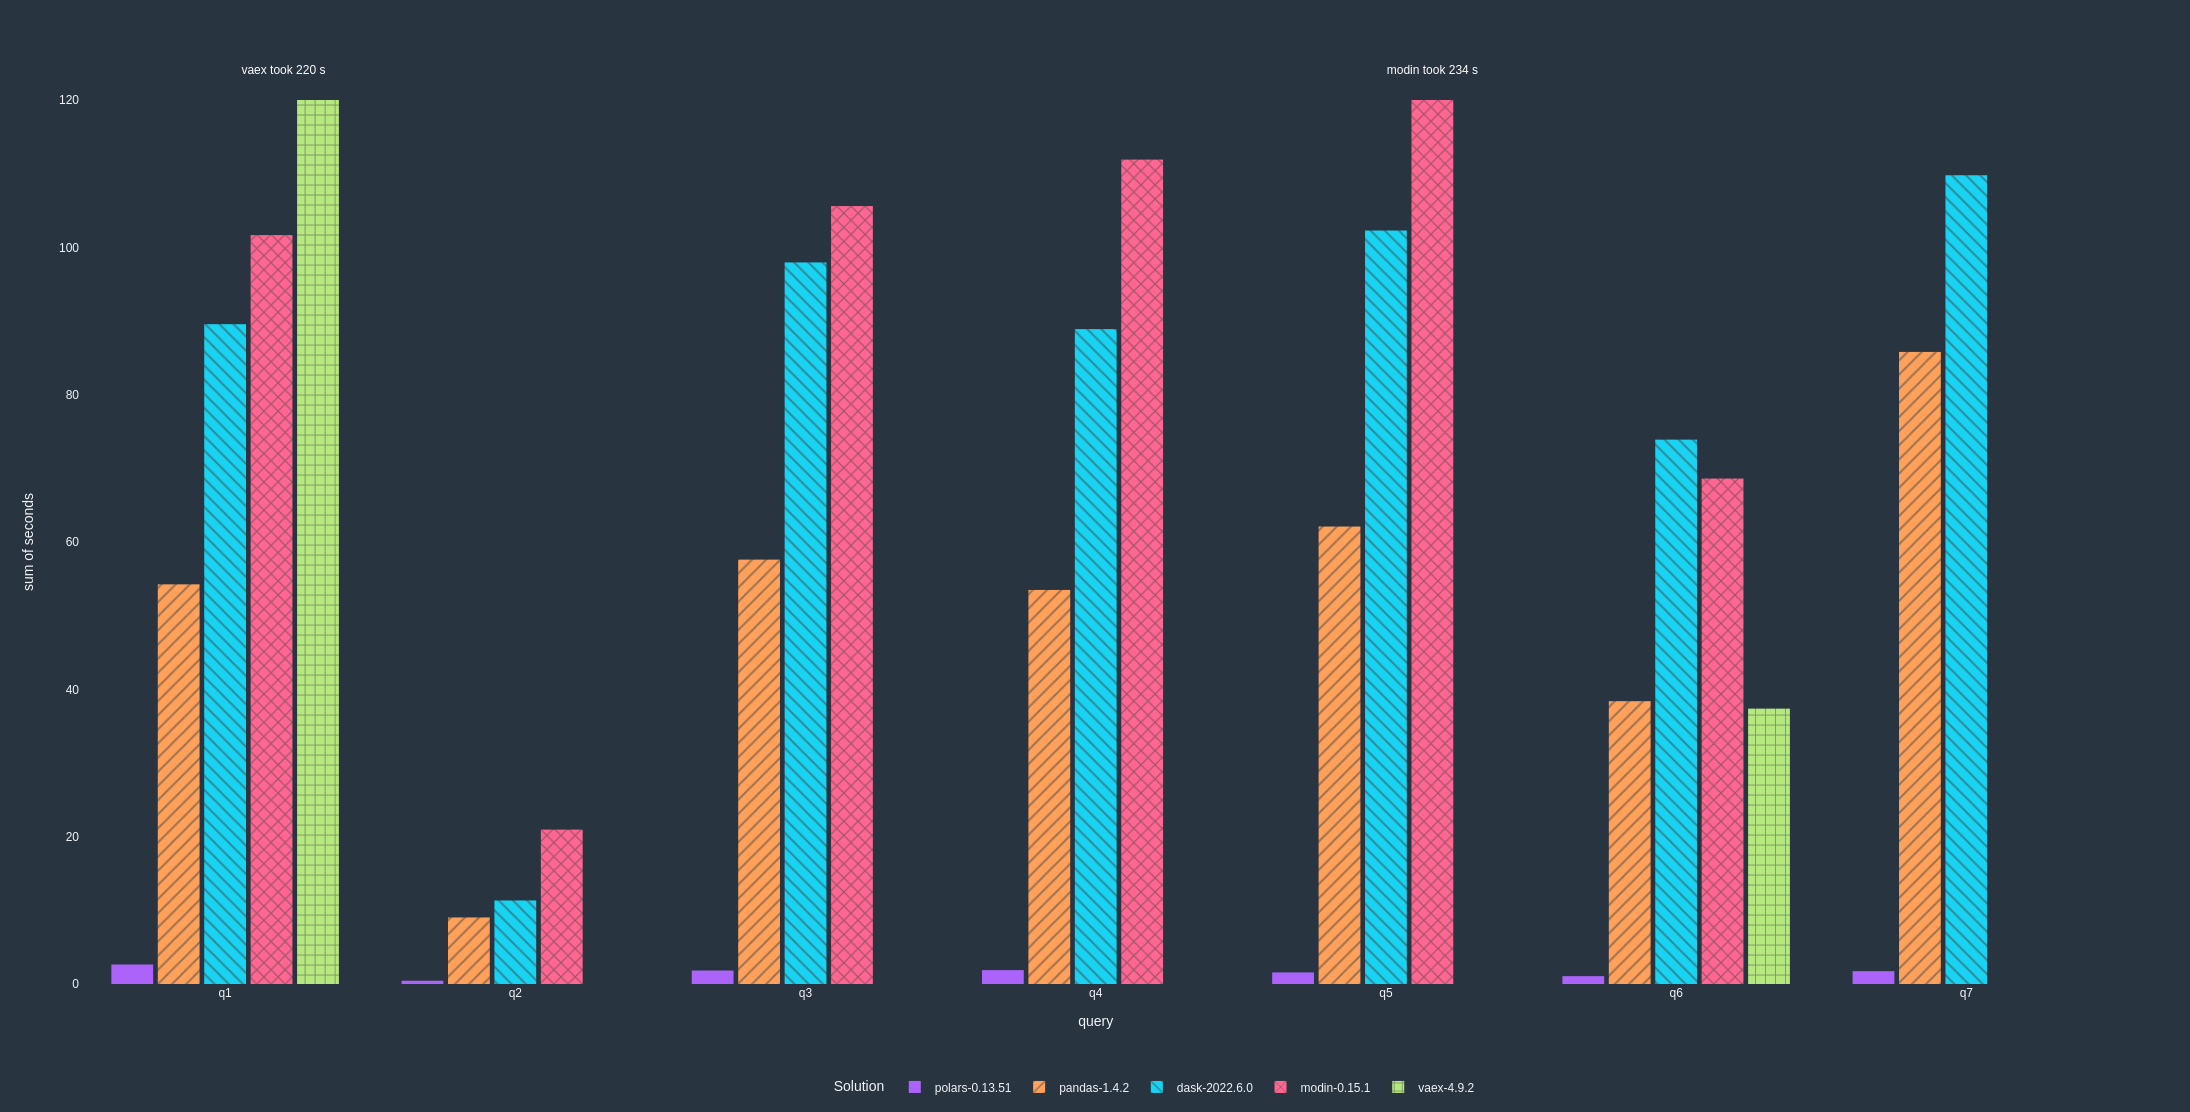

In [18]:
display.Image('sf_10_and_io.png')

In [15]:
data = pl.read_csv('players_20.csv')

In [30]:
lazy_data = data.lazy()
lazy_data.explain()

'DF ["sofifa_id", "player_url", "short_name", "long_name"]; PROJECT */104 COLUMNS; SELECTION: "None"'

●	Load the csv file and show top 5 records from it

In [26]:
data.head(5)

sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,…,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
i64,str,str,str,i64,str,i64,i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,str,str,str,i64,str,str,i64,str,str,i64,str,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
158023,"""https://sofifa…","""L. Messi""","""Lionel Andrés …",32,"""1987-06-24""",170,72,"""Argentina""","""FC Barcelona""",94,94,95500000,565000,"""RW, CF, ST""","""Left""",5,4,4,"""Medium/Low""","""Messi""","""Yes""",195800000,"""#Dribbler, #Di…","""RW""",10,null,"""2004-07-01""",2021,null,null,87,92,92,96,39,66,…,94,75,96,33,37,26,6,11,15,14,8,"""89+2""","""89+2""","""89+2""","""93+2""","""93+2""","""93+2""","""93+2""","""93+2""","""93+2""","""93+2""","""93+2""","""92+2""","""87+2""","""87+2""","""87+2""","""92+2""","""68+2""","""66+2""","""66+2""","""66+2""","""68+2""","""63+2""","""52+2""","""52+2""","""52+2""","""63+2"""
20801,"""https://sofifa…","""Cristiano Rona…","""Cristiano Rona…",34,"""1985-02-05""",187,83,"""Portugal""","""Juventus""",93,93,58500000,405000,"""ST, LW""","""Right""",5,4,5,"""High/Low""","""C. Ronaldo""","""Yes""",96500000,"""#Speedster, #D…","""LW""",7,null,"""2018-07-10""",2022,"""LS""",7,90,93,82,89,35,78,…,82,85,95,28,32,24,7,11,15,14,11,"""91+3""","""91+3""","""91+3""","""89+3""","""90+3""","""90+3""","""90+3""","""89+3""","""88+3""","""88+3""","""88+3""","""88+3""","""81+3""","""81+3""","""81+3""","""88+3""","""65+3""","""61+3""","""61+3""","""61+3""","""65+3""","""61+3""","""53+3""","""53+3""","""53+3""","""61+3"""
190871,"""https://sofifa…","""Neymar Jr""","""Neymar da Silv…",27,"""1992-02-05""",175,68,"""Brazil""","""Paris Saint-Ge…",92,92,105500000,290000,"""LW, CAM""","""Right""",5,5,5,"""High/Medium""","""Neymar""","""Yes""",195200000,"""#Speedster, #D…","""CAM""",10,null,"""2017-08-03""",2022,"""LW""",10,91,85,87,95,32,58,…,90,90,94,27,26,29,9,9,15,15,11,"""84+3""","""84+3""","""84+3""","""90+3""","""89+3""","""89+3""","""89+3""","""90+3""","""90+3""","""90+3""","""90+3""","""89+3""","""82+3""","""82+3""","""82+3""","""89+3""","""66+3""","""61+3""","""61+3""","""61+3""","""66+3""","""61+3""","""46+3""","""46+3""","""46+3""","""61+3"""
200389,"""https://sofifa…","""J. Oblak""","""Jan Oblak""",26,"""1993-01-07""",188,87,"""Slovenia""","""Atlético Madri…",91,93,77500000,125000,"""GK""","""Right""",3,3,1,"""Medium/Medium""","""Normal""","""Yes""",164700000,null,"""GK""",13,null,"""2014-07-16""",2023,"""GK""",1,null,null,null,null,null,null,…,65,11,68,27,12,18,87,92,78,90,89,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
183277,"""https://sofifa…","""E. Hazard""","""Eden Hazard""",28,"""1991-01-07""",175,74,"""Belgium""","""Real Madrid""",91,91,90000000,470000,"""LW, CF""","""Right""",4,4,4,"""High/Medium""","""Normal""","""Yes""",184500000,"""#Speedster, #D…","""LW""",7,null,"""2019-07-01""",2024,"""LF""",10,91,83,86,94,35,66,…,89,88,91,34,27,22,11,12,6,8,8,"""83+3""","""83+3""","""83+3""","""89+3""","""88+3""","""88+3""","""88+3""","""89+3""","""89+3""","""89+3""","""89+3""","""89+3""","""83+3""","""83+3""","""83+3""","""89+3""","""66+3""","""63+3""","""63+3""","""63+3""","""66+3""",""

●	How you would be able to see each column's name

●	Show the number of rows and columns in the dataset

In [90]:
print(f'There are {len(data)} rows')
print(f'There are {len(data.columns)} columns')

There are 18278 rows
There are 104 columns


●	Show the number of players in each country

In [91]:
country_count = data.groupby('nationality').count().sort(by='count', descending=True)
country_count

nationality,count
str,u32
"""England""",1667
"""Germany""",1216
"""Spain""",1035
"""France""",984
"""Argentina""",886
"""Brazil""",824
"""Italy""",732
"""Colombia""",591
"""Japan""",453


●	Show the top 10 countries with the highest amount of players

In [92]:
country_count.head(10)

nationality,count
str,u32
"""England""",1667
"""Germany""",1216
"""Spain""",1035
"""France""",984
"""Argentina""",886
"""Brazil""",824
"""Italy""",732
"""Colombia""",591
"""Japan""",453


●	Create a bar plot of the top 5 countries with the highest number of players, and fill the bars in green


In [93]:
country_count = country_count.head(5)
#sns.barplot(data=country_count, x=country_count['nationality'], y=country_count['count'])
px.bar(x=country_count['nationality'], y=country_count['count'], color_discrete_sequence=['green', 'green'])

●	Display the short name and wages for the top 5 players

In [94]:
top_five = data.head(5)
top_five[['short_name', 'wage_eur']]

short_name,wage_eur
str,i64
"""L. Messi""",565000
"""Cristiano Rona…",405000
"""Neymar Jr""",290000
"""J. Oblak""",125000
"""E. Hazard""",470000


●	Display the short name and wages for the top 5 players with the highest salaries

In [95]:
top_five_salaries = data.sort(by='wage_eur', descending=True).head(5)
top_five_salaries

sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,…,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
i64,str,str,str,i64,str,i64,i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,str,str,str,i64,str,str,i64,str,str,i64,str,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
158023,"""https://sofifa…","""L. Messi""","""Lionel Andrés …",32,"""1987-06-24""",170,72,"""Argentina""","""FC Barcelona""",94,94,95500000,565000,"""RW, CF, ST""","""Left""",5,4,4,"""Medium/Low""","""Messi""","""Yes""",195800000,"""#Dribbler, #Di…","""RW""",10,null,"""2004-07-01""",2021,null,null,87,92,92,96,39,66,…,94,75,96,33,37,26,6,11,15,14,8,"""89+2""","""89+2""","""89+2""","""93+2""","""93+2""","""93+2""","""93+2""","""93+2""","""93+2""","""93+2""","""93+2""","""92+2""","""87+2""","""87+2""","""87+2""","""92+2""","""68+2""","""66+2""","""66+2""","""66+2""","""68+2""","""63+2""","""52+2""","""52+2""","""52+2""","""63+2"""
183277,"""https://sofifa…","""E. Hazard""","""Eden Hazard""",28,"""1991-01-07""",175,74,"""Belgium""","""Real Madrid""",91,91,90000000,470000,"""LW, CF""","""Right""",4,4,4,"""High/Medium""","""Normal""","""Yes""",184500000,"""#Speedster, #D…","""LW""",7,null,"""2019-07-01""",2024,"""LF""",10,91,83,86,94,35,66,…,89,88,91,34,27,22,11,12,6,8,8,"""83+3""","""83+3""","""83+3""","""89+3""","""88+3""","""88+3""","""88+3""","""89+3""","""89+3""","""89+3""","""89+3""","""89+3""","""83+3""","""83+3""","""83+3""","""89+3""","""66+3""","""63+3""","""63+3""","""63+3""","""66+3""","""61+3""","""49+3""","""49+3""","""49+3""","""61+3"""
20801,"""https://sofifa…","""Cristiano Rona…","""Cristiano Rona…",34,"""1985-02-05""",187,83,"""Portugal""","""Juventus""",93,93,58500000,405000,"""ST, LW""","""Right""",5,4,5,"""High/Low""","""C. Ronaldo""","""Yes""",96500000,"""#Speedster, #D…","""LW""",7,null,"""2018-07-10""",2022,"""LS""",7,90,93,82,89,35,78,…,82,85,95,28,32,24,7,11,15,14,11,"""91+3""","""91+3""","""91+3""","""89+3""","""90+3""","""90+3""","""90+3""","""89+3""","""88+3""","""88+3""","""88+3""","""88+3""","""81+3""","""81+3""","""81+3""","""88+3""","""65+3""","""61+3""","""61+3""","""61+3""","""65+3""","""61+3""","""53+3""","""53+3""","""53+3""","""61+3"""
192985,"""https://sofifa…","""K. De Bruyne""","""Kevin De Bruyn…",28,"""1991-06-28""",181,70,"""Belgium""","""Manchester Cit…",91,91,90000000,370000,"""CAM, CM""","""Right""",4,5,4,"""High/High""","""Normal""","""Yes""",166500000,"""#Dribbler, #Pl…","""RCM""",17,null,"""2015-08-30""",2023,"""RCM""",7,76,86,92,86,61,78,…,94,79,91,68,58,51,15,13,5,10,13,"""82+3""","""82+3""","""82+3""","""87+3""","""87+3""","""87+3""","""87+3""","""87+3""","""88+3""","""88+3""","""88+3""","""88+3""","""87+3""","""87+3""","""87+3""","""88+3""","""77+3""","""77+3""","""77+3""","""77+3""","""77+3""","""73+3""","""66+3""","""66+3""","""66+3""","""73+3"""
194765,"""https://sofifa…","""A. Griezmann""","""Antoine Griezm…",28,"""1991-03-21""",176,73,"""France""","""FC Barcelona""",89,89,69000000,370000,"""CF, ST, LW""","""Left""",4,3,4,"""High/High""","""Normal""","""Yes""",141500000,"""#Dribbler, #En…","""LW""",17,null,"""2019-07-12""",2024,"""CAM""",7,81,86,84,89,57,72,…,86,86,89,59,54,49,14,8,14,13,14,"""85+3""","""85+3""","""85+3""","""87+3""","""87+3""","""87+3""

●	Create a bar plot of the previous bullet point

In [96]:
px.bar(x=top_five_salaries['short_name'], y=top_five_salaries['wage_eur'])

●	Show top 10 records for Germany

In [97]:
germany = data.filter(data["nationality"] == "Germany")
germany.head(10)

sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,…,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
i64,str,str,str,i64,str,i64,i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,str,str,str,i64,str,str,i64,str,str,i64,str,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
192448,"""https://sofifa…","""M. ter Stegen""","""Marc-André ter…",27,"""1992-04-30""",187,85,"""Germany""","""FC Barcelona""",90,93,67500000,250000,"""GK""","""Right""",3,4,1,"""Medium/Medium""","""Normal""","""Yes""",143400000,null,"""GK""",1,null,"""2014-07-01""",2022,"""SUB""",22,null,null,null,null,null,null,…,70,25,70,25,13,10,88,85,88,88,90,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
167495,"""https://sofifa…","""M. Neuer""","""Manuel Neuer""",33,"""1986-03-27""",193,92,"""Germany""","""FC Bayern Münc…",88,88,32000000,155000,"""GK""","""Right""",5,4,1,"""Medium/Medium""","""Normal""","""Yes""",52800000,null,"""GK""",1,null,"""2011-07-01""",2021,"""GK""",1,null,null,null,null,null,null,…,70,47,70,17,10,11,87,87,91,85,87,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
182521,"""https://sofifa…","""T. Kroos""","""Toni Kroos""",29,"""1990-01-04""",183,76,"""Germany""","""Real Madrid""",88,88,57000000,330000,"""CM""","""Right""",4,5,3,"""Medium/Medium""","""Normal""","""Yes""",116900000,"""#Playmaker , …","""LCM""",8,null,"""2014-07-17""",2023,"""SUB""",8,45,80,90,81,70,69,…,89,73,88,72,70,62,10,11,13,7,10,"""75+3""","""75+3""","""75+3""","""78+3""","""79+3""","""79+3""","""79+3""","""78+3""","""81+3""","""81+3""","""81+3""","""79+3""","""85+3""","""85+3""","""85+3""","""79+3""","""75+3""","""79+3""","""79+3""","""79+3""","""75+3""","""72+3""","""69+3""","""69+3""","""69+3""","""72+3"""
188350,"""https://sofifa…","""M. Reus""","""Marco Reus""",30,"""1989-05-31""",180,71,"""Germany""","""Borussia Dortm…",88,88,56000000,170000,"""CAM, LM, ST""","""Right""",4,4,4,"""High/Medium""","""Lean""","""Yes""",92400000,"""#Dribbler, #Pl…","""CAM""",11,null,"""2012-07-01""",2023,"""ST""",11,85,88,84,87,45,66,…,86,90,85,49,37,45,12,12,13,13,11,"""82+3""","""82+3""","""82+3""","""86+3""","""86+3""","""86+3""","""86+3""","""86+3""","""86+3""","""86+3""","""86+3""","""85+3""","""80+3""","""80+3""","""80+3""","""85+3""","""69+3""","""65+3""","""65+3""","""65+3""","""69+3""","""64+3""","""55+3""","""55+3""","""55+3""","""64+3"""
178603,"""https://sofifa…","""M. Hummels""","""Mats Hummels""",30,"""1988-12-16""",191,94,"""Germany""","""Borussia Dortm…",87,87,41000000,130000,"""CB""","""Right""",4,3,3,"""High/Medium""","""Normal""","""Yes""",67700000,"""#Tackling , #T…","""LCB""",15,null,"""2019-07-01""",2022,null,null,51,58,76,72,89,76,…,79,68,89,90,89,86,15,6,10,5,6,"""68+3""","""68+3""","""68+3""","""67+3""","""68+3""","""68+3""","""68+3""","""67+3""","""71+3""","""71+3""","""71+3""","""69+3""","""77+3""","""77+3""","""77+3""","""69+3""","""77+3""","""83+3""","""83+3""","""83+3""","""77+3""","""78+3""","""84+3""","""84+3""","""84+3""","""78+3"""
222492,"""https://sofifa…","""L. Sané""","""Leroy Sané""",23,"""1996-01-11""",183,75,"""Germany""","""Mancheste

●	Show the top 5 records of Germany players who have a maximum height, weight and wage

In [98]:
germany.filter((germany['height_cm'] == germany['height_cm'].max()) | 
               (germany['weight_kg'] == germany['weight_kg'].max()) | 
               (germany['wage_eur'] == germany['wage_eur'].max()))

sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,…,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
i64,str,str,str,i64,str,i64,i64,str,str,i64,i64,i64,i64,str,str,i64,i64,i64,str,str,str,i64,str,str,i64,str,str,i64,str,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
182521,"""https://sofifa…","""T. Kroos""","""Toni Kroos""",29,"""1990-01-04""",183,76,"""Germany""","""Real Madrid""",88,88,57000000,330000,"""CM""","""Right""",4,5,3,"""Medium/Medium""","""Normal""","""Yes""",116900000,"""#Playmaker , …","""LCM""",8,null,"""2014-07-17""",2023,"""SUB""",8,45,80,90,81,70,69,…,89,73,88,72,70,62,10,11,13,7,10,"""75+3""","""75+3""","""75+3""","""78+3""","""79+3""","""79+3""","""79+3""","""78+3""","""81+3""","""81+3""","""81+3""","""79+3""","""85+3""","""85+3""","""85+3""","""79+3""","""75+3""","""79+3""","""79+3""","""79+3""","""75+3""","""72+3""","""69+3""","""69+3""","""69+3""","""72+3"""
199833,"""https://sofifa…","""L. Unnerstall""","""Lars Unnerstal…",28,"""1990-07-20""",198,103,"""Germany""","""PSV""",76,78,6500000,14000,"""GK""","""Right""",1,1,1,"""Medium/Medium""","""Stocky""","""No""",9600000,null,"""SUB""",13,null,"""2018-07-01""",2021,null,null,null,null,null,null,null,null,…,42,16,58,11,17,15,76,75,72,74,77,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
236831,"""https://sofifa…","""A. Seydel""","""Aaron Seydel""",23,"""1996-02-07""",199,90,"""Germany""","""1. FSV Mainz 0…",67,73,1100000,9000,"""ST, LM""","""Left""",1,4,3,"""Medium/Low""","""Normal""","""No""",2000000,null,"""SUB""",36,null,"""2016-11-27""",2021,null,null,68,64,53,66,29,66,…,59,55,68,25,28,22,12,9,14,11,9,"""66+2""","""66+2""","""66+2""","""64+2""","""65+2""","""65+2""","""65+2""","""64+2""","""62+2""","""62+2""","""62+2""","""62+2""","""54+2""","""54+2""","""54+2""","""62+2""","""46+2""","""43+2""","""43+2""","""43+2""","""46+2""","""44+2""","""43+2""","""43+2""","""43+2""","""44+2"""
239746,"""https://sofifa…","""L. Watkowiak""","""Lukas Watkowia…",23,"""1996-03-06""",197,103,"""Germany""","""SV Wehen Wiesb…",62,68,325000,2000,"""GK""","""Right""",1,3,1,"""Medium/Medium""","""Stocky""","""No""",569000,null,"""GK""",1,null,"""2017-07-01""",2021,null,null,null,null,null,null,null,null,…,32,15,21,7,13,13,59,59,57,63,66,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


●	Display the short name and wages of the top 5 Germany players

In [99]:
germany.head(5)[['short_name', 'wage_eur']]

short_name,wage_eur
str,i64
"""M. ter Stegen""",250000
"""M. Neuer""",155000
"""T. Kroos""",330000
"""M. Reus""",170000
"""M. Hummels""",130000


●	Show top 5 players who have the best shooting skills among all the players with short names

In [100]:
shooting = data.sort(by='shooting', descending=True)
shooting.head(5)[['short_name', 'shooting', 'overall']]

short_name,shooting,overall
str,i64,i64
"""Cristiano Rona…",93,93
"""L. Messi""",92,94
"""H. Kane""",91,89
"""S. Agüero""",90,89
"""L. Suárez""",89,89


In [101]:
defending = data.sort(by='defending', descending=True)
defending.head(5)[['short_name', 'defending', 'nationality', 'club', 'overall']]

short_name,defending,nationality,club,overall
str,i64,str,str,i64
"""V. van Dijk""",90,"""Netherlands""","""Liverpool""",90
"""G. Chiellini""",90,"""Italy""","""Juventus""",89
"""K. Koulibaly""",89,"""Senegal""","""Napoli""",89
"""D. Godín""",89,"""Uruguay""","""Inter""",88
"""M. Hummels""",89,"""Germany""","""Borussia Dortm…",87


●	Show wage records of the top 5 players of the 'Real Madrid' team

●	Show shooting records of top 5 players of 'Real Madrid' team

●	Show defending records of top 5 players of 'Real Madrid' team

●	Show nationality records of top 5 players of 'Real Madrid' team

In [102]:
real_madrid = data.filter(data['club'] == 'Real Madrid')
real_madrid = real_madrid.filter(real_madrid['shooting'].is_not_null())
real_madrid = real_madrid.filter(real_madrid['defending'].is_not_null())

real_madrid.head(5)[['short_name', 'shooting', 'defending', 'nationality', 'wage_eur']]

short_name,shooting,defending,nationality,wage_eur
str,i64,i64,str,i64
"""E. Hazard""",83,35,"""Belgium""",470000
"""L. Modrić""",76,72,"""Croatia""",340000
"""Sergio Ramos""",68,87,"""Spain""",300000
"""T. Kroos""",80,70,"""Germany""",330000
"""Casemiro""",72,85,"""Brazil""",240000
